# RNN

## Deep learning project

## Marie Philippe & Claire Serraz - M2 D3S

# 1. Libraries

In [1]:
import pandas as pd 
import os
import matplotlib.pyplot as plt 
import numpy as np 

In [2]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score

In [3]:
import tensorflow as tf 
from keras.layers import Input, Dense, LSTM, Embedding
from keras.layers import Dropout, Activation, Bidirectional, GlobalMaxPool1D
from keras.models import Sequential
from tensorflow.keras.preprocessing.text import Tokenizer

# 2. Import data

In [4]:
# Choose the path

# Marie
os.chdir("/Users/marie/Desktop/Cours/S1/DL/Project/Data")

In [5]:
df = pd.read_csv('data.csv')
df = df.astype({"text": str, 'title':str})
df

,title,text,subject,date,class
0,donald trump sends embarrassing new year eve m...,donald trump wish american happy new year leav...,News,"December 31, 2017",fake
1,drunk bragging trump staffer started russian c...,house intelligence committee chairman devin nu...,News,"December 31, 2017",fake
2,sheriff david clarke becomes internet joke thr...,friday revealed former milwaukee sheriff david...,News,"December 30, 2017",fake
3,trump obsessed even obama name coded website i...,christmas day donald trump announced would bac...,News,"December 29, 2017",fake
4,pope francis called donald trump christmas speech,pope francis used annual christmas day message...,News,"December 25, 2017",fake
...,...,...,...,...,...
44893,fully committed nato back new u approach afgha...,brussels reuters nato ally tuesday welcomed pr...,worldnews,"August 22, 2017",true
44894,lexisnexis withdrew two product chinese market,london reuters lexisnexis provider legal regul...,worldnews,"August 22, 2017",true
44895,minsk cultural hub becomes authority,minsk reuters shadow disused soviet-era factor...,worldnews,"August 22, 2017",true
44896,vatican upbeat possibility pope francis visiti...,moscow reuters vatican secretary state cardina...,worldnews,"August 22, 2017",true


In [6]:
# Coding class
df['class'] = df['class'].replace(['fake'],0)
df['class'] = df['class'].replace(['true'],1)

# 3. Define the datasets

In [7]:
# Define the train, validation and test data
train, valid, test = np.split(df.sample(frac=1,random_state=10),[int(.8*len(df)), int(.9*len(df))])

In [8]:
X_train = train['title']+train['text']
X_test = test['title']+test['text']
X_valid = valid['title']+valid['text']

y_train = train['class']
y_test = test['class']
y_valid = valid['class']

# 4. Tokenize the text

In [9]:
tokenizer = Tokenizer(num_words=20000)
tokenizer.fit_on_texts(X_train)

In [10]:
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)
X_valid = tokenizer.texts_to_sequences(X_valid)

In [11]:
X_train = tf.keras.preprocessing.sequence.pad_sequences(X_train, maxlen=256)
X_test = tf.keras.preprocessing.sequence.pad_sequences(X_test, maxlen=256)
X_valid = tf.keras.preprocessing.sequence.pad_sequences(X_valid, maxlen=256)

# 5. Model

In [12]:
model = Sequential()

model.add(Embedding(20000, 128))
model.add(Bidirectional(LSTM(25, return_sequences=True)))
model.add(GlobalMaxPool1D())
model.add(Dropout(0.5))
model.add(Dense(50, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1))

In [13]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])

# 6. Validate the model with train and validation sets

In [14]:
# Validate the model
history = model.fit(X_train, y_train, epochs=5, validation_data=(X_valid, y_valid), batch_size=32)

Epoch 1/5
1123/1123 [==============================] - 340s 296ms/step - loss: 0.3699 - accuracy: 0.7822 - val_loss: 0.0841 - val_accuracy: 0.9639
Epoch 2/5
1123/1123 [==============================] - 328s 292ms/step - loss: 0.0944 - accuracy: 0.9702 - val_loss: 0.0522 - val_accuracy: 0.9793
Epoch 3/5
1123/1123 [==============================] - 258s 230ms/step - loss: 0.0625 - accuracy: 0.9816 - val_loss: 0.0440 - val_accuracy: 0.9800
Epoch 4/5
1123/1123 [==============================] - 352s 314ms/step - loss: 0.0389 - accuracy: 0.9895 - val_loss: 0.0246 - val_accuracy: 0.9913
Epoch 5/5
1123/1123 [==============================] - 312s 278ms/step - loss: 0.0231 - accuracy: 0.9939 - val_loss: 0.0251 - val_accuracy: 0.9915


In [15]:
# We print the loss and the accuracy for the train set
score2 = model.evaluate(X_train, y_train, verbose=0)
print('Train loss:', score2[0])
print('Train accuracy:', score2[1])

Train loss: 0.009045502170920372
Train accuracy: 0.9977726936340332


In [16]:
# We print the loss and the accuracy for the validation set
score = model.evaluate(X_valid, y_valid, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.025125985965132713
Test accuracy: 0.9915367364883423


In [17]:
# We define a function to display loss and accuracy evolution during training
def plot_history(hist):
  plt.plot(hist.history['loss'], label='train')
  plt.plot(hist.history['val_loss'], label='val')
  plt.legend()
  plt.ylim((0,1))
  plt.title('Loss evolution')
  plt.show()
  plt.plot(hist.history['accuracy'], label='train')
  plt.plot(hist.history['val_accuracy'], label='val')
  plt.legend()
  plt.ylim((0,1))
  plt.title('Accuracy evolution')
  plt.show()

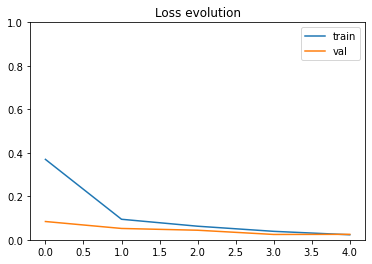

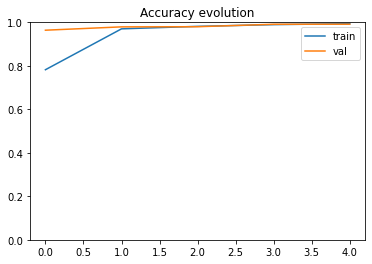

In [18]:
plot_history(history)

# 7. Classification

In [20]:
# We train our model
prediction = model.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test), batch_size=32)

Epoch 1/5
1123/1123 [==============================] - 292s 260ms/step - loss: 0.0167 - accuracy: 0.9956 - val_loss: 0.0393 - val_accuracy: 0.9902
Epoch 2/5
1123/1123 [==============================] - 284s 253ms/step - loss: 0.0125 - accuracy: 0.9972 - val_loss: 0.0354 - val_accuracy: 0.9920
Epoch 3/5
1123/1123 [==============================] - 287s 256ms/step - loss: 0.0088 - accuracy: 0.9982 - val_loss: 0.0518 - val_accuracy: 0.9882
Epoch 4/5
1123/1123 [==============================] - 308s 274ms/step - loss: 0.0086 - accuracy: 0.9981 - val_loss: 0.0523 - val_accuracy: 0.9900
Epoch 5/5
1123/1123 [==============================] - 294s 262ms/step - loss: 0.0049 - accuracy: 0.9988 - val_loss: 0.0476 - val_accuracy: 0.9898


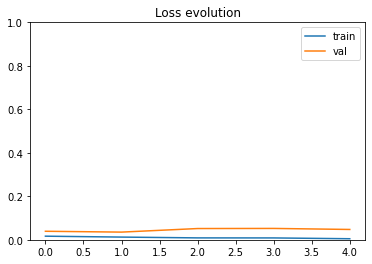

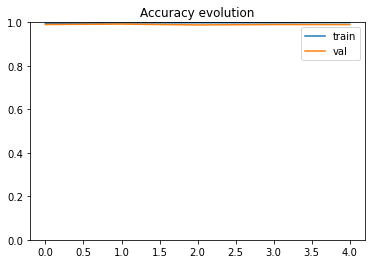

In [21]:
plot_history(prediction)

In [22]:
pred = model.predict(X_test)

In [23]:
predictions = []

for i in pred:
    if i >= 0.5:
        predictions.append(1)
    else:
        predictions.append(0) 

In [24]:
print('Accuracy on the tes set:', accuracy_score(predictions, y_test))
print('Precision on the test set:', precision_score(predictions, y_test))
print('Recall on the test set:', recall_score(predictions, y_test))

Accuracy on the tes set: 0.9897550111358575
Precision on the test set: 0.985040797824116
Recall on the test set: 0.994053064958829
